In [467]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import average_precision_score, precision_recall_curve

In [468]:
f1 = pd.read_csv("train_change1.01.csv", skiprows=0)
f2 = pd.read_csv("test_change1.01.csv", skiprows=0)
f1['DEFAULTER'].value_counts()

0    2869
1     707
Name: DEFAULTER, dtype: int64

In [469]:
scl = preprocessing.StandardScaler()
fields = f1.columns.values[:-1]
clean_f1 = pd.DataFrame(scl.fit_transform(f1[fields]), columns=fields)
f1.to_csv('train_change1.01.csv')

In [470]:
f1.corr()

,Unnamed: 0,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
Unnamed: 0,1.000000,0.018153,-0.029092,-0.017225,-0.023499,-0.037489,0.004446,-0.018920,-0.030430,-0.015476,-0.013956,-0.000050,0.015110,-0.010414,0.012536,0.007307
AMOUNT,0.018153,1.000000,0.216158,0.343881,0.155840,0.096938,0.086427,-0.028885,0.095662,0.075257,0.068881,0.022059,0.004278,0.071263,-0.006072,-0.073777
DUE_MORTGAGE,-0.029092,0.216158,1.000000,0.806782,0.014579,0.308251,-0.059152,-0.001727,0.136292,0.305444,0.139190,-0.015275,-0.025594,0.042158,0.002948,-0.032781
VALUE,-0.017225,0.343881,0.806782,1.000000,0.009480,0.342185,0.041877,-0.001974,0.186059,0.278336,0.112910,-0.008110,-0.030334,0.021486,0.011571,-0.038833
REASON,-0.023499,0.155840,0.014579,0.009480,1.000000,-0.060802,-0.036506,-0.008104,-0.062918,0.121435,0.033590,0.013123,0.007232,0.118994,-0.014266,-0.027423
OCC,-0.037489,0.096938,0.308251,0.342185,-0.060802,1.000000,0.030049,0.040186,0.089771,0.212981,-0.004791,0.011205,-0.009355,-0.020064,0.025504,-0.017894
TJOB,0.004446,0.086427,-0.059152,0.041877,-0.036506,0.030049,1.000000,0.079525,0.163986,0.067033,-0.022374,-0.008446,-0.047427,-0.023781,-0.025346,-0.040072
DCL,-0.018920,-0.028885,-0.001727,-0.001974,-0.008104,0.040186,0.079525,1.000000,0.022782,0.153513,0.004637,0.021173,0.151714,0.037149,-0.004644,0.311645
CLT,-0.030430,0.095662,0.136292,0.186059,-0.062918,0.089771,0.163986,0.022782,1.000000,0.246345,-0.030369,0.008125,-0.080185,-0.108828,-0.026346,-0.196008
CL_COUNT,-0.015476,0.075257,0.305444,0.278336,0.121435,0.212981,0.067033,0.153513,0.246345,1.000000,0.157337,-0.007738,0.055875,0.086867,-0.021643,-0.023683


In [471]:
f1.iloc[:,0:-1].values

array([[0.0000e+00, 1.5100e+04, 7.1168e+04, ..., 0.0000e+00, 1.0000e+00,
        2.0095e+00],
       [1.0000e+00, 2.1100e+04, 8.1747e+04, ..., 0.0000e+00, 1.0000e+00,
        1.2724e+00],
       [2.0000e+00, 1.5900e+04, 9.4262e+04, ..., 0.0000e+00, 2.0000e+00,
        1.4725e+00],
       ...,
       [3.5730e+03, 1.4900e+04, 5.0469e+04, ..., 0.0000e+00, 0.0000e+00,
        1.3898e+00],
       [3.5740e+03, 1.1100e+04, 1.1626e+05, ..., 0.0000e+00, 1.0000e+00,
        2.5919e+00],
       [3.5750e+03, 2.3600e+04, 4.4851e+04, ..., 0.0000e+00, 1.0000e+00,
        1.5597e+00]])

In [472]:
f1.values.shape

(3576, 16)

In [473]:
f1

,Unnamed: 0,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
0,0,15100,71168.000000,97480.0,1,0,9.0,0,119.166667,19.0,33.650308,0,0,1,2.00950,1
1,1,21100,81747.000000,109840.0,1,0,1.0,0,174.786162,24.0,40.067527,0,0,1,1.27240,0
2,2,15900,94262.000000,128414.0,1,3,4.0,0,242.736126,42.0,39.231892,1,0,2,1.47250,0
3,3,12900,110899.000000,124480.0,1,2,7.0,0,204.900000,40.0,33.650308,0,1,2,1.57010,1
4,4,24600,74028.507532,35523.0,0,0,21.0,0,84.111988,15.0,29.865634,0,0,1,1.50130,0
5,5,15000,65742.000000,86608.0,0,0,1.0,0,289.581891,20.0,28.285563,0,0,0,1.51770,0
6,6,22800,75253.000000,106166.0,1,0,1.0,0,176.339376,24.0,38.266594,0,0,1,2.43220,0
7,7,23200,133766.000000,174085.0,1,3,26.0,3,333.409840,28.0,30.778638,0,0,0,0.82074,0
8,8,11900,117952.000000,125305.0,1,5,5.0,0,182.172065,18.0,33.210397,0,0,0,2.23040,0
9,9,13700,55763.000000,87480.0,1,4,9.0,0,194.766667,20.0,33.650308,0,0,0,1.24350,0


In [474]:
from sklearn.utils import shuffle
f1 = shuffle(f1)
f1.values

array([[1.19100e+03, 1.68000e+04, 4.36930e+04, ..., 1.00000e+00,
        4.96800e-01, 0.00000e+00],
       [3.03000e+03, 1.56000e+04, 5.61050e+04, ..., 4.00000e+00,
        1.80400e+00, 0.00000e+00],
       [1.47800e+03, 1.96000e+04, 1.00345e+05, ..., 1.00000e+00,
        2.39580e+00, 0.00000e+00],
       ...,
       [3.04400e+03, 4.00000e+03, 1.43990e+04, ..., 5.00000e+00,
        1.34570e+00, 1.00000e+00],
       [1.74000e+03, 1.61000e+04, 1.61990e+04, ..., 1.00000e+00,
        1.13390e+00, 0.00000e+00],
       [2.78000e+03, 1.47000e+04, 7.60930e+04, ..., 1.00000e+00,
        2.04130e+00, 0.00000e+00]])

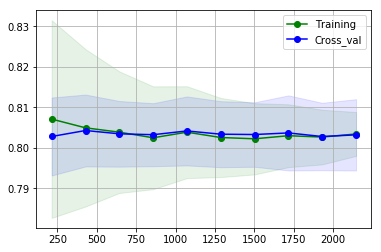

In [475]:
from sklearn.model_selection import learning_curve, ShuffleSplit
X = f1.iloc[:,:-1].values
y = f1.iloc[:,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution = linear_model.LogisticRegression()
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 'o-', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

LOGISTIC REGRESSION

In [476]:
from sklearn.model_selection import GridSearchCV
log = linear_model.LogisticRegression()
parameter_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
search_grid = GridSearchCV(log, parameter_grid, cv=20, scoring='accuracy')
search_grid.fit(X,y)
mean_scores = [res.mean_validation_score for res in search_grid.grid_scores_]
print(search_grid.best_estimator_)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


/home/vijit/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [477]:
model_logistic = linear_model.LogisticRegression(C=search_grid.best_estimator_.C)
model_logistic.fit(np.array(f1.iloc[:1851,:-1].values), np.array(f1.iloc[:1851,-1].values))
logistic_output_val = model_logistic.predict(np.array(f1.iloc[1851:,:-1].values))
logistic_accuracy = accuracy_score(np.array(f1.iloc[1851:,-1].values), logistic_output_val)
print(logistic_accuracy)

0.8040579710144927


Text(0.5,-11.7696,'Predicted label')

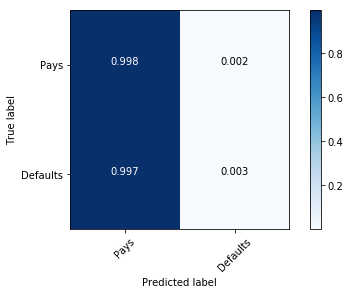

In [478]:
import itertools
from sklearn.metrics import confusion_matrix
normalize = True
#def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
cm = confusion_matrix(np.array(f1.iloc[1851:,-1].values), logistic_output_val, labels=[0, 1])
classes=["Pays", "Defaults"]
cmap = plt.cm.Blues
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=3)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [479]:
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

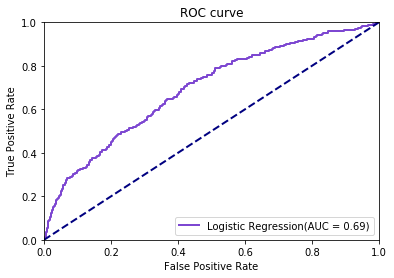

In [480]:
logistic_predict_probab = model_logistic.predict_proba(np.array(f1.iloc[1851:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[1851:,-1].values), logistic_predict_probab,'Logistic Regression')
#print(logistic_predict_probab)

K Nearest Neighbors

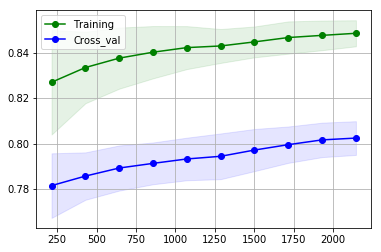

In [481]:
X = f1.iloc[:,1:-1].values
y = f1.iloc[:,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution = KNeighborsClassifier()
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 'o-', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

In [482]:
knn = KNeighborsClassifier()
parameter_grid = {'n_neighbors':[i for i in range(10, 100)]}
search_grid = GridSearchCV(knn, parameter_grid, cv=20, scoring='accuracy')
search_grid.fit(f1.iloc[:,1:-1].values, f1.iloc[:,-1].values)
search_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [483]:
model_knn = KNeighborsClassifier(n_neighbors=search_grid.best_estimator_.n_neighbors)
model_knn.fit(np.array(f1.iloc[:1851,:-1].values), np.array(f1.iloc[:1851,-1].values))
knn_output_val = model_knn.predict(np.array(f1.iloc[1851:,:-1].values))
knn_accuracy = accuracy_score(np.array(f1.iloc[1851:,-1].values), knn_output_val)
print(knn_accuracy)

0.8115942028985508


Text(0.5,-11.7696,'Predicted label')

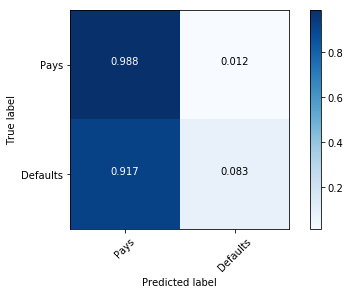

In [484]:
normalize = True
#def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
cm = confusion_matrix(np.array(f1.iloc[1851:,-1].values), knn_output_val, labels=[0, 1])
classes=["Pays", "Defaults"]
cmap = plt.cm.Blues
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=3)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

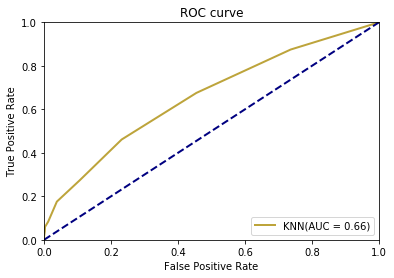

In [485]:
knn_predict_probab = model_knn.predict_proba(np.array(f1.iloc[1851:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[1851:,-1].values), knn_predict_probab,'KNN')

Multi-Level Perceptron Classification

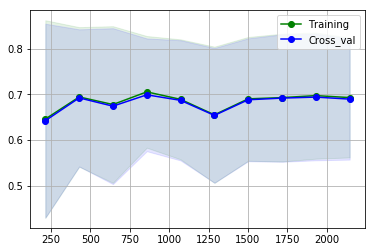

In [486]:
X = f1.iloc[:,1:-1].values
y = f1.iloc[:,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution = MLPClassifier()
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 'o-', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

In [487]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier(solver='lbfgs', alpha=0.00001, hidden_layer_sizes=(5, 2))
model_nn.fit(np.array(f1.iloc[:1851,:-1].values), np.array(f1.iloc[:1851,-1].values))
nn_output_val = model_nn.predict(np.array(f1.iloc[1851:,:-1].values))
nn_accuracy = accuracy_score(np.array(f1.iloc[1851:,-1].values), nn_output_val)
print(nn_output_val, nn_accuracy)

[0 0 0 ... 0 0 0] 0.8052173913043478


Text(0.5,-11.7696,'Predicted label')

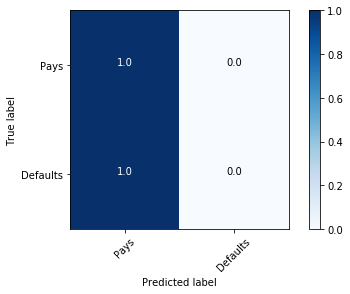

In [488]:
normalize = True
#def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
cm = confusion_matrix(np.array(f1.iloc[1851:,-1].values), nn_output_val, labels=[0, 1])
classes=["Pays", "Defaults"]
cmap = plt.cm.Blues
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=3)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

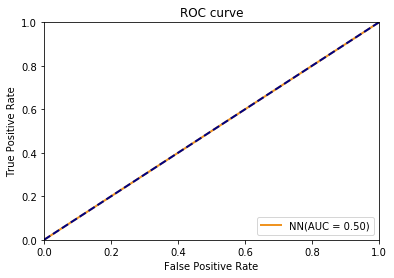

In [489]:
nn_predict_probab = model_nn.predict_proba(np.array(f1.iloc[1851:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[1851:,-1].values), nn_predict_probab,'NN')

Decision Tree Classification

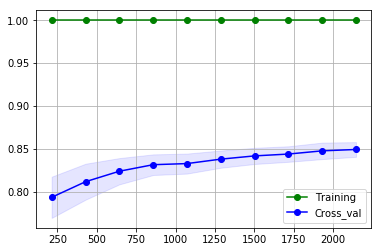

In [490]:
X = f1.iloc[:,1:-1].values
y = f1.iloc[:,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution = tree.DecisionTreeClassifier()
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 'o-', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

In [491]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
parameter_grid = {'max_depth':[i for i in range(1,15)]}
search_grid = GridSearchCV(dt, parameter_grid, cv=20, scoring='accuracy')
search_grid.fit(f1.iloc[:,1:-1].values, f1.iloc[:,-1].values)
mean_scores = [res.mean_validation_score for res in search_grid.grid_scores_]
print(search_grid.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


/home/vijit/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [492]:
model_dtree = tree.DecisionTreeClassifier(max_depth=search_grid.best_estimator_.max_depth)
model_dtree.fit(f1.iloc[:1851,:-1].values, f1.iloc[:1851,-1].values)
dtree_output_val = model_dtree.predict(np.array(f1.iloc[1851:,:-1].values))
dtree_accuracy = accuracy_score(np.array(f1.iloc[1851:,-1].values), dtree_output_val)
print(dtree_accuracy)

0.88


Text(0.5,-11.7696,'Predicted label')

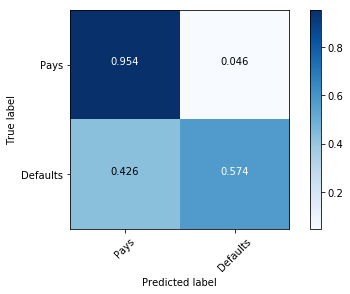

In [493]:
normalize = True
#def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
cm = confusion_matrix(np.array(f1.iloc[1851:,-1].values), dtree_output_val, labels=[0, 1])
classes=["Pays", "Defaults"]
cmap = plt.cm.Blues
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=3)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

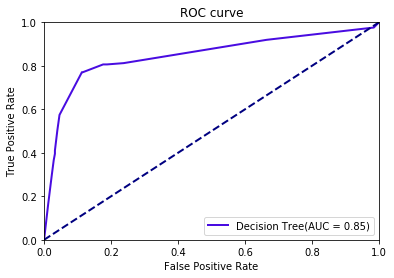

In [494]:
dtree_predict_probab = model_dtree.predict_proba(np.array(f1.iloc[1851:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[1851:,-1].values), dtree_predict_probab,'Decision Tree')

K-Means Clustering

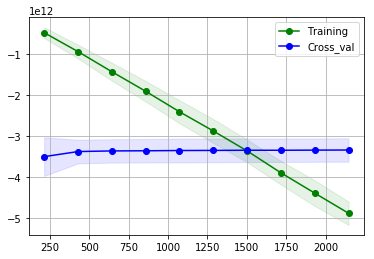

In [495]:
X = f1.iloc[:,1:-1].values
y = f1.iloc[:,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution =  KMeans(n_clusters=2)
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 'o-', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

In [496]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(f1.iloc[:1851,:-1].values, f1.iloc[:1851,-1].values)
kmeans_output_val = model_kmeans.predict(np.array(f1.iloc[1851:,:-1].values))
kmeans_accuracy = accuracy_score(np.array(f1.iloc[1851:,-1].values), dtree_output_val)
print(kmeans_accuracy)

0.88


Text(0.5,-11.7696,'Predicted label')

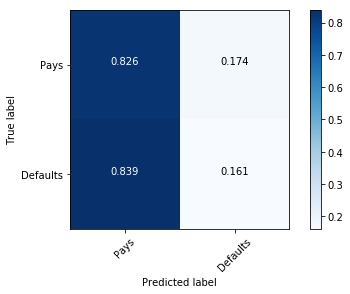

In [497]:
normalize = True
#def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
cm = confusion_matrix(np.array(f1.iloc[1851:,-1].values), kmeans_output_val, labels=[0, 1])
classes=["Pays", "Defaults"]
cmap = plt.cm.Blues
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=3)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Cumulative auc-roc graph for all methods is as follows:

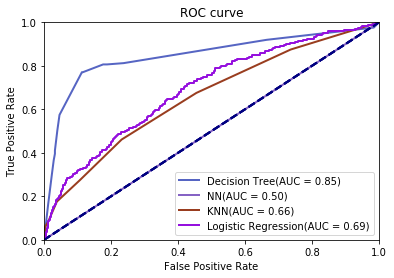

In [498]:
dtree_predict_probab = model_dtree.predict_proba(np.array(f1.iloc[1851:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[1851:,-1].values), dtree_predict_probab,'Decision Tree')
nn_predict_probab = model_nn.predict_proba(np.array(f1.iloc[1851:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[1851:,-1].values), nn_predict_probab,'NN')
knn_predict_probab = model_knn.predict_proba(np.array(f1.iloc[1851:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[1851:,-1].values), knn_predict_probab,'KNN')
logistic_predict_probab = model_logistic.predict_proba(np.array(f1.iloc[1851:,:-1].values))[:,1]
plotAUC(np.array(f1.iloc[1851:,-1].values), logistic_predict_probab,'Logistic Regression')

Now we make predictions over test where we dont have acutal labels
and we compare our results amoungst all predictions

In [499]:
f2 = pd.read_csv("test_change1.01.csv")
f2 = shuffle(f2)
f2

,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3
344,8800,87314.000000,201669.000000,0,5,13.0,0,14.924759,7.000000,20.263864,0,0,0,1.53250
1979,14500,63570.000000,70962.000000,1,4,0.0,0,170.346647,34.000000,42.801633,0,0,1,0.98327
1860,15100,48685.000000,72480.000000,1,0,10.0,0,76.400000,9.000000,33.650308,0,0,2,2.41350
1554,23000,28116.000000,52784.000000,1,0,14.0,0,110.365685,25.000000,30.597728,0,0,1,1.18400
361,15900,20564.000000,43770.000000,1,3,8.0,0,109.413937,11.000000,22.836892,0,0,0,1.04320
2035,32900,35357.000000,78096.000000,1,0,9.0,0,127.517705,23.000000,33.698057,0,0,0,0.56317
2208,20100,9546.000000,31900.000000,1,0,0.0,0,25.686231,3.000000,28.950360,0,1,1,1.72480
2184,11900,116641.000000,137365.000000,1,4,15.0,1,171.540035,33.000000,30.795004,0,0,1,2.63700
1548,18800,39340.000000,71325.000000,1,0,11.0,4,133.836758,13.000000,27.701648,0,0,0,1.56960
1489,21400,133841.000000,282952.000000,0,3,3.0,0,198.148190,15.000000,30.555401,0,0,0,1.84030


for Logistic Regresssion

In [500]:
logistic_output_test = model_logistic.predict(np.array(f2.iloc[:,:].values))

ValueError: X has 14 features per sample; expecting 15

K-Means Clustering

In [ ]:
kmeans_output_test = model_kmeans.predict(np.array(f2.iloc[:,:].values))

Decision Tree Classification

In [ ]:
dtree_output_test = model_dtree.predict(np.array(f2.iloc[:,:].values))

K-Nearest Neigbhors Classification

In [ ]:
knn_output_test = model_knn.predict(np.array(f2.iloc[:,:].values))

Multi-level Perceptron Classification 

In [ ]:
nn_output_test = model_nn.predict(np.array(f2.iloc[:,:].values))

In [ ]:
list_all_outputs = {}
list_all_outputs['logistic_output_test'] = logistic_output_test
list_all_outputs['kmeans_output_test'] = kmeans_output_test
list_all_outputs['dtree_output_test'] = dtree_output_test
list_all_outputs['knn_output_test'] = knn_output_test
list_all_outputs['nn_output_test'] = nn_output_test

In [ ]:
visited = {'logistic_output_test':[], 'kmeans_output_test':[], 'dtree_output_test':[], 'knn_output_test':[], 'nn_output_test':[]}
for i in list_all_outputs.keys():
        for j in list_all_outputs.keys():
            if i != j:
                if i not in visited[j]:
                    visited[j].append(i)
                    visited[i].append(j)
                    count = 0
                    for k in range(len(list_all_outputs[i])):
                        if list_all_outputs[i][k] == list_all_outputs[j][k]:
                            count += 1
                    print(count*100/len(list_all_outputs[i]), i, '   and   ',j)


In [ ]:
from sklearn.metrics import classification_report
print("logst", classification_report(np.array(f1.iloc[1851:,-1].values), logistic_output_val))
print("k-nns", classification_report(np.array(f1.iloc[1851:,-1].values), knn_output_val))
print("m-lpc", classification_report(np.array(f1.iloc[1851:,-1].values), nn_output_val))
print("dtree", classification_report(np.array(f1.iloc[1851:,-1].values), dtree_output_val))
print("kmean", classification_report(np.array(f1.iloc[1851:,-1].values), kmeans_output_val))